In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
oildf = pd.read_csv("/content/drive/MyDrive/DS320 Final Project/data/interim/OilData_Clean.csv")
co2df = pd.read_csv("/content/drive/MyDrive/DS320 Final Project/data/interim/CO2_Clean.csv")
gasdf = pd.read_csv("/content/drive/MyDrive/DS320 Final Project/data/interim/Gas_Consumption_Clean.csv")
tempbycountry = pd.read_csv("/content/drive/MyDrive/DS320 Final Project/data/interim/GlobalLandTemperaturesByCountry.csv")
greenhousedf = pd.read_csv("/content/drive/MyDrive/DS320 Final Project/data/interim/GreenhouseGasClean.csv")
energydf = pd.read_csv("/content/drive/MyDrive/DS320 Final Project/data/interim/Primary-energy-consumption-from-fossilfuels-nuclear-renewables.csv")
coaldf = pd.read_csv("/content/drive/MyDrive/DS320 Final Project/data/interim/Coal_Clean.csv")

In [ ]:
co2df= co2df.rename(columns={"Year":'year'})
gasdf= gasdf.rename(columns={"Year":'year'})
tempbycountry = tempbycountry.rename(columns={"DateTime":"year"})
energydf = energydf.rename(columns={"Year":"year"})

In [ ]:
def remove_Unknown(df):
  df = df[df["short_name"].str.contains("Unknown")==False]
  return df

In [ ]:
gasdf = remove_Unknown(gasdf)
oildf = remove_Unknown(oildf)
tempbycountry = remove_Unknown(tempbycountry)
co2df = remove_Unknown(co2df)
greenhousedf = remove_Unknown(greenhousedf)
energydf = remove_Unknown(energydf)
coaldf = remove_Unknown(coaldf)
gasdf.head()

,Unnamed: 0,Country,year,Gas Consumption - TWh,short_name
56,56,Algeria,1965,7.430500,Algeria
57,57,Algeria,1966,7.719250,Algeria
58,58,Algeria,1967,7.488250,Algeria
59,59,Algeria,1968,7.873250,Algeria
60,60,Algeria,1969,10.351688,Algeria


In [ ]:
def add_key(df):
  df["key"] = df["year"].astype(str) + df['short_name']
  return df

In [ ]:
oildf2 = add_key(oildf)
co2df2 = add_key(co2df)
gasdf2 = add_key(gasdf)
tempbycountry2 = add_key(tempbycountry)
greenhousedf2 = add_key(greenhousedf)
energydf2 = add_key(energydf)
coaldf2 = add_key(coaldf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
oildf.head()

,Unnamed: 0,Country,year,value,short_name,key
0,223,United States,1992,7171,United States,1992United States
1,224,Saudi Arabia,1992,8332,Saudi Arabia,1992Saudi Arabia
2,225,Russia,1992,7632,Russia,1992Russia
3,226,Canada,1992,1605,Canada,1992Canada
4,227,Iraq,1992,425,Iraq,1992Iraq


In [ ]:
oildf.describe()

,Unnamed: 0,year
count,5778.000000,5778.000000
mean,3229.640187,2005.000000
std,1738.180584,7.789555
min,223.000000,1992.000000
25%,1722.250000,1998.000000
50%,3229.500000,2005.000000
75%,4736.750000,2012.000000
max,6238.000000,2018.000000


In [ ]:
co2df.head()


,Unnamed: 0,year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),short_name,key
0,0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0,United Kingdom,1751United Kingdom
1,1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0,United Kingdom,1752United Kingdom
2,2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0,United Kingdom,1753United Kingdom
3,3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0,United Kingdom,1754United Kingdom
4,4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0,United Kingdom,1755United Kingdom


In [ ]:
greenhousedf.describe()

,Unnamed: 0,year,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent
count,1049.000000,1049.000000,1.049000e+03,9.240000e+02,1.049000e+03,950.000000,1049.000000,223.000000,1049.000000,806.000000,1007.000000,50.000000
mean,542.446139,2001.988561,3.440405e+05,4.650740e+05,4.362390e+05,5898.077253,61120.433422,115.815336,23403.951649,1533.833710,995.129057,3655.015200
std,311.425814,7.208447,9.029995e+05,1.189987e+06,1.123331e+06,18044.933135,157976.627809,281.159805,63652.663207,3369.674788,3435.475870,2764.998077
min,0.000000,1990.000000,7.188000e+01,8.673000e+01,8.673000e+01,0.000000,0.850000,0.060000,1.650000,0.000000,0.000000,151.950000
25%,262.000000,1996.000000,2.300523e+04,4.923827e+04,2.878282e+04,82.442500,3927.750000,0.960000,2554.430000,35.285000,4.645000,821.710000
50%,549.000000,2002.000000,6.097182e+04,8.024449e+04,7.894229e+04,703.120000,11651.670000,15.530000,6346.050000,200.210000,45.450000,4158.530000
75%,811.000000,2008.000000,3.191204e+05,4.156832e+05,4.115355e+05,3768.385000,44591.040000,46.465000,19607.630000,1443.415000,339.640000,5535.937500
max,1073.000000,2014.000000,6.122747e+06,7.422208e+06,7.422208e+06,157237.340000,942383.460000,1561.300000,433872.650000,24255.670000,31080.410000,9449.890000


In [ ]:
energydf.describe()

,Unnamed: 0,year,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy)
count,4064.000000,4064.000000,4064.000000,4064.000000,4064.000000
mean,2149.904281,1993.174213,86.998344,9.896718,3.053229
std,1214.960616,15.665110,15.219160,13.499249,6.750992
min,55.000000,1965.000000,17.162000,0.000000,0.000000
25%,1070.750000,1980.000000,81.471250,0.828500,0.000000
50%,2141.500000,1994.000000,92.488000,4.579500,0.000000
75%,3212.250000,2007.000000,98.214250,13.975250,1.380500
max,4228.000000,2019.000000,100.000000,82.835000,41.707000


In [ ]:
tempbycountry.describe()

,Unnamed: 0,year,AverageTemperature,AverageTemperatureUncertainty
count,46398.000000,46398.000000,44150.000000,44213.000000
mean,24195.594702,1908.479159,17.169083,1.038533
std,13836.222923,66.286372,9.399259,1.074509
min,0.000000,1743.000000,-22.616000,0.115083
25%,12150.250000,1862.000000,9.482750,0.350917
50%,24151.500000,1913.000000,20.309833,0.600833
75%,36289.750000,1964.000000,25.699896,1.243667
max,48242.000000,2013.000000,30.744750,7.281667


In [ ]:
greenhousedf = greenhousedf.loc[(greenhousedf['year'] > 1991) & (greenhousedf['year'] < 2013)]


In [ ]:
def cutyears(df):
  df = df.loc[(df['year'] > 1991) & (df['year'] < 2014)]
  return df

In [ ]:
greenhousedf = cutyears(greenhousedf)
tempbycountry = cutyears(tempbycountry)
energydf = cutyears(energydf)
coaldf = cutyears(coaldf)
co2df = cutyears(co2df)
gasdf = cutyears(gasdf)

In [ ]:
#co2df.describe()

In [ ]:
#co2df.head()

In [ ]:
#gasdf.head()

In [ ]:
#tempbycountry.head()

In [ ]:
#greenhousedf.head()

In [ ]:
#energydf.head()

In [ ]:
#coaldf.info()

In [ ]:
#energydf.info()

In [ ]:
from functools import reduce

In [ ]:
#co2df2.info()

In [ ]:
#co2df.info()

In [ ]:
dfs = [co2df, energydf, greenhousedf,gasdf, oildf, tempbycountry]
# co2df2, energydf2, greenhousedf2,tempbycountry2,gasdf2, co2df2, oildf2

In [ ]:
df_final = reduce(lambda left,right: pd.merge(left,right, on="key"), dfs)

In [ ]:
#pd.set_option('max_rows', 2000)

In [ ]:
#df_final

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 902
Data columns (total 51 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   Unnamed: 0_x                                                                                                    903 non-null    int64  
 1   year_x                                                                                                          903 non-null    int64  
 2   Country_x                                                                                                       903 non-null    object 
 3   Total                                                                                                           903 non-null    int64  
 4   Solid Fuel                                  

In [ ]:
x = df_final.drop(columns=["Unnamed: 0_x", "Country_x", "Unnamed: 0_y", "Country_y", "Code", "year_y", "short_name_y", "country_or_area", "year_x", "Unnamed: 0_x", "Country_x", "year_y","Country_y", "year_y", "Country_y", "short_name_y" ], axis=1)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 902
Data columns (total 30 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   Total                                                                                                           903 non-null    int64  
 1   Solid Fuel                                                                                                      903 non-null    int64  
 2   Liquid Fuel                                                                                                     903 non-null    int64  
 3   Gas Fuel                                                                                                        903 non-null    int64  
 4   Cement                                      

In [ ]:
x.head()

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),short_name_x,key,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy),carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,short_name_x,Gas Consumption - TWh,value,short_name_x,Country,AverageTemperature,AverageTemperatureUncertainty
0,73080,41244,22021,8958,736,122,4.17,1823,Australia,1992Australia,95.648,4.352,0.000,284766.09,423080.11,423080.11,1333.18,116837.51,NaN,15293.18,4603.28,246.86,NaN,Australia,166.369570,591,Australia,Australia,21.932583,0.227917
1,15451,3477,7929,3361,684,0,1.99,301,Austria,1992Austria,70.395,29.605,0.000,60432.25,75931.00,75931.00,5.64,10164.75,NaN,4161.62,510.47,656.27,NaN,Austria,64.482234,24,Austria,Austria,7.615583,0.257000
2,23839,2149,12122,9256,313,0,2.31,0,Belarus,1992Belarus,99.989,0.011,0.000,87060.81,116588.69,116588.69,NaN,16295.44,NaN,13232.44,NaN,NaN,NaN,Belarus,157.178289,40,Belarus,Belarus,7.132000,0.242667
3,30534,9171,14613,5652,1098,0,3.05,4421,Belgium,1992Belgium,81.066,0.265,18.669,122217.92,148384.73,148384.73,484.30,11886.35,NaN,9858.70,2284.77,1652.69,NaN,Belgium,105.201250,0,Belgium,Belgium,10.489250,0.260333
4,14782,8252,3955,2285,290,0,1.71,235,Bulgaria,1992Bulgaria,84.627,2.329,13.043,56551.59,NaN,77199.35,0.01,14869.30,NaN,5774.31,NaN,4.13,NaN,Bulgaria,47.121250,1.1,Bulgaria,Bulgaria,11.021750,0.332000


In [ ]:
#y = x[["AverageTemperature"]]

In [ ]:
train = x

In [ ]:
train

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),short_name_x,key,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy),carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,short_name_x,Gas Consumption - TWh,value,short_name_x,Country,AverageTemperature,AverageTemperatureUncertainty
0,73080,41244,22021,8958,736,122,4.17,1823,Australia,1992Australia,95.648,4.352,0.000,284766.09,423080.11,423080.11,1333.18,116837.51,NaN,15293.18,4603.28,246.86,NaN,Australia,166.369570,591,Australia,Australia,21.932583,0.227917
1,15451,3477,7929,3361,684,0,1.99,301,Austria,1992Austria,70.395,29.605,0.000,60432.25,75931.00,75931.00,5.64,10164.75,NaN,4161.62,510.47,656.27,NaN,Austria,64.482234,24,Austria,Austria,7.615583,0.257000
2,23839,2149,12122,9256,313,0,2.31,0,Belarus,1992Belarus,99.989,0.011,0.000,87060.81,116588.69,116588.69,NaN,16295.44,NaN,13232.44,NaN,NaN,NaN,Belarus,157.178289,40,Belarus,Belarus,7.132000,0.242667
3,30534,9171,14613,5652,1098,0,3.05,4421,Belgium,1992Belgium,81.066,0.265,18.669,122217.92,148384.73,148384.73,484.30,11886.35,NaN,9858.70,2284.77,1652.69,NaN,Belgium,105.201250,0,Belgium,Belgium,10.489250,0.260333
4,14782,8252,3955,2285,290,0,1.71,235,Bulgaria,1992Bulgaria,84.627,2.329,13.043,56551.59,NaN,77199.35,0.01,14869.30,NaN,5774.31,NaN,4.13,NaN,Bulgaria,47.121250,1.1,Bulgaria,Bulgaria,11.021750,0.332000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,89872,36927,20984,23273,8688,0,1.20,1017,Turkey,2012Turkey,88.096,11.844,0.000,363126.01,447452.33,447452.33,4256.86,58027.01,NaN,21116.02,NaN,926.43,NaN,Turkey,433.192150,45.60183060000001,Turkey,Turkey,12.854417,0.335000
899,80663,43570,8877,26876,1339,0,1.78,255,Ukraine,2012Ukraine,81.720,2.026,16.254,295706.06,409531.35,409531.35,828.41,80865.70,NaN,32120.19,NaN,10.99,NaN,Ukraine,518.387168,74.67767213,Ukraine,Ukraine,9.290667,0.303667
900,127781,39717,44872,41549,1081,563,2.01,11295,United Kingdom,2012United Kingdom,87.449,4.919,7.632,484388.09,NaN,582946.59,15794.76,60961.91,0.33,20963.79,255.06,582.65,NaN,United Kingdom,768.987389,954.1847022,United Kingdom,United Kingdom,9.037417,0.264500
901,127781,39717,44872,41549,1081,563,2.01,11295,United Kingdom,2012United Kingdom,87.449,4.919,7.632,484388.09,NaN,582946.59,15794.76,60961.91,0.33,20963.79,255.06,582.65,NaN,United Kingdom,768.987389,954.1847022,United Kingdom,United Kingdom (Europe),9.185167,0.249917


In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(train)

Your selected dataframe has 30 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,861,95.3
nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent,676,74.9
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,176,19.5
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,105,11.6
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,58,6.4
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,18,2.0


In [ ]:
train = train.drop(["unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent", "nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent"], axis= 1)

In [ ]:
train

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),short_name_x,key,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy),carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,short_name_x,Gas Consumption - TWh,value,short_name_x,Country,AverageTemperature,AverageTemperatureUncertainty
0,73080,41244,22021,8958,736,122,4.17,1823,Australia,1992Australia,95.648,4.352,0.000,284766.09,423080.11,423080.11,1333.18,116837.51,15293.18,4603.28,246.86,Australia,166.369570,591,Australia,Australia,21.932583,0.227917
1,15451,3477,7929,3361,684,0,1.99,301,Austria,1992Austria,70.395,29.605,0.000,60432.25,75931.00,75931.00,5.64,10164.75,4161.62,510.47,656.27,Austria,64.482234,24,Austria,Austria,7.615583,0.257000
2,23839,2149,12122,9256,313,0,2.31,0,Belarus,1992Belarus,99.989,0.011,0.000,87060.81,116588.69,116588.69,NaN,16295.44,13232.44,NaN,NaN,Belarus,157.178289,40,Belarus,Belarus,7.132000,0.242667
3,30534,9171,14613,5652,1098,0,3.05,4421,Belgium,1992Belgium,81.066,0.265,18.669,122217.92,148384.73,148384.73,484.30,11886.35,9858.70,2284.77,1652.69,Belgium,105.201250,0,Belgium,Belgium,10.489250,0.260333
4,14782,8252,3955,2285,290,0,1.71,235,Bulgaria,1992Bulgaria,84.627,2.329,13.043,56551.59,NaN,77199.35,0.01,14869.30,5774.31,NaN,4.13,Bulgaria,47.121250,1.1,Bulgaria,Bulgaria,11.021750,0.332000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,89872,36927,20984,23273,8688,0,1.20,1017,Turkey,2012Turkey,88.096,11.844,0.000,363126.01,447452.33,447452.33,4256.86,58027.01,21116.02,NaN,926.43,Turkey,433.192150,45.60183060000001,Turkey,Turkey,12.854417,0.335000
899,80663,43570,8877,26876,1339,0,1.78,255,Ukraine,2012Ukraine,81.720,2.026,16.254,295706.06,409531.35,409531.35,828.41,80865.70,32120.19,NaN,10.99,Ukraine,518.387168,74.67767213,Ukraine,Ukraine,9.290667,0.303667
900,127781,39717,44872,41549,1081,563,2.01,11295,United Kingdom,2012United Kingdom,87.449,4.919,7.632,484388.09,NaN,582946.59,15794.76,60961.91,20963.79,255.06,582.65,United Kingdom,768.987389,954.1847022,United Kingdom,United Kingdom,9.037417,0.264500
901,127781,39717,44872,41549,1081,563,2.01,11295,United Kingdom,2012United Kingdom,87.449,4.919,7.632,484388.09,NaN,582946.59,15794.76,60961.91,20963.79,255.06,582.65,United Kingdom,768.987389,954.1847022,United Kingdom,United Kingdom (Europe),9.185167,0.249917


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 902
Data columns (total 28 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   Total                                                                                                           903 non-null    int64  
 1   Solid Fuel                                                                                                      903 non-null    int64  
 2   Liquid Fuel                                                                                                     903 non-null    int64  
 3   Gas Fuel                                                                                                        903 non-null    int64  
 4   Cement                                      

In [ ]:
#Prediction #greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent

In [ ]:
train["countrycount"] = train[['key']].iloc[:3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
names = []

for i in train["key"]:
    names.append(i[4:])

train["short_name"] = names


In [ ]:
train

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),short_name_x,key,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy),carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,short_name_x,Gas Consumption - TWh,value,short_name_x,Country,AverageTemperature,AverageTemperatureUncertainty,countrycount,short_name
0,73080,41244,22021,8958,736,122,4.17,1823,Australia,1992Australia,95.648,4.352,0.000,284766.09,423080.11,423080.11,1333.18,116837.51,15293.18,4603.28,246.86,Australia,166.369570,591,Australia,Australia,21.932583,0.227917,1992Australia,Australia
1,15451,3477,7929,3361,684,0,1.99,301,Austria,1992Austria,70.395,29.605,0.000,60432.25,75931.00,75931.00,5.64,10164.75,4161.62,510.47,656.27,Austria,64.482234,24,Austria,Austria,7.615583,0.257000,1992Austria,Austria
2,23839,2149,12122,9256,313,0,2.31,0,Belarus,1992Belarus,99.989,0.011,0.000,87060.81,116588.69,116588.69,NaN,16295.44,13232.44,NaN,NaN,Belarus,157.178289,40,Belarus,Belarus,7.132000,0.242667,1992Belarus,Belarus
3,30534,9171,14613,5652,1098,0,3.05,4421,Belgium,1992Belgium,81.066,0.265,18.669,122217.92,148384.73,148384.73,484.30,11886.35,9858.70,2284.77,1652.69,Belgium,105.201250,0,Belgium,Belgium,10.489250,0.260333,NaN,Belgium
4,14782,8252,3955,2285,290,0,1.71,235,Bulgaria,1992Bulgaria,84.627,2.329,13.043,56551.59,NaN,77199.35,0.01,14869.30,5774.31,NaN,4.13,Bulgaria,47.121250,1.1,Bulgaria,Bulgaria,11.021750,0.332000,NaN,Bulgaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,89872,36927,20984,23273,8688,0,1.20,1017,Turkey,2012Turkey,88.096,11.844,0.000,363126.01,447452.33,447452.33,4256.86,58027.01,21116.02,NaN,926.43,Turkey,433.192150,45.60183060000001,Turkey,Turkey,12.854417,0.335000,NaN,Turkey
899,80663,43570,8877,26876,1339,0,1.78,255,Ukraine,2012Ukraine,81.720,2.026,16.254,295706.06,409531.35,409531.35,828.41,80865.70,32120.19,NaN,10.99,Ukraine,518.387168,74.67767213,Ukraine,Ukraine,9.290667,0.303667,NaN,Ukraine
900,127781,39717,44872,41549,1081,563,2.01,11295,United Kingdom,2012United Kingdom,87.449,4.919,7.632,484388.09,NaN,582946.59,15794.76,60961.91,20963.79,255.06,582.65,United Kingdom,768.987389,954.1847022,United Kingdom,United Kingdom,9.037417,0.264500,NaN,United Kingdom
901,127781,39717,44872,41549,1081,563,2.01,11295,United Kingdom,2012United Kingdom,87.449,4.919,7.632,484388.09,NaN,582946.59,15794.76,60961.91,20963.79,255.06,582.65,United Kingdom,768.987389,954.1847022,United Kingdom,United Kingdom (Europe),9.185167,0.249917,NaN,United Kingdom


In [ ]:
# get rid of the short names 
# take features, 80 - 20 split 
# predict temperature off of features 

In [ ]:
train = train.drop_duplicates(subset=["key"])

In [ ]:
train["short_name"].value_counts()

United Kingdom    21
Greece            21
Belgium           21
Czech Republic    21
Ireland           21
Australia         21
Turkey            21
Belarus           21
Netherlands       21
Ukraine           21
Spain             21
Iceland           21
Estonia           21
Cyprus            21
Japan             21
Norway            21
Austria           21
Latvia            21
Lithuania         21
Canada            21
Switzerland       21
Bulgaria          21
Slovenia          21
United States     21
France            21
Slovakia          21
Hungary           21
Poland            21
Luxembourg        21
Portugal          21
Denmark           21
Germany           21
Sweden            21
Italy             21
New Zealand       21
Romania           21
Russia            21
Croatia           21
Finland           21
Name: short_name, dtype: int64

In [ ]:
train

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),short_name_x,key,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy),carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,short_name_x,Gas Consumption - TWh,value,short_name_x,Country,AverageTemperature,AverageTemperatureUncertainty,countrycount,short_name
0,73080,41244,22021,8958,736,122,4.17,1823,Australia,1992Australia,95.648,4.352,0.000,284766.09,423080.11,423080.11,1333.18,116837.51,15293.18,4603.28,246.86,Australia,166.369570,591,Australia,Australia,21.932583,0.227917,1992Australia,Australia
1,15451,3477,7929,3361,684,0,1.99,301,Austria,1992Austria,70.395,29.605,0.000,60432.25,75931.00,75931.00,5.64,10164.75,4161.62,510.47,656.27,Austria,64.482234,24,Austria,Austria,7.615583,0.257000,1992Austria,Austria
2,23839,2149,12122,9256,313,0,2.31,0,Belarus,1992Belarus,99.989,0.011,0.000,87060.81,116588.69,116588.69,NaN,16295.44,13232.44,NaN,NaN,Belarus,157.178289,40,Belarus,Belarus,7.132000,0.242667,1992Belarus,Belarus
3,30534,9171,14613,5652,1098,0,3.05,4421,Belgium,1992Belgium,81.066,0.265,18.669,122217.92,148384.73,148384.73,484.30,11886.35,9858.70,2284.77,1652.69,Belgium,105.201250,0,Belgium,Belgium,10.489250,0.260333,NaN,Belgium
4,14782,8252,3955,2285,290,0,1.71,235,Bulgaria,1992Bulgaria,84.627,2.329,13.043,56551.59,NaN,77199.35,0.01,14869.30,5774.31,NaN,4.13,Bulgaria,47.121250,1.1,Bulgaria,Bulgaria,11.021750,0.332000,NaN,Bulgaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,10301,126,7730,1828,617,0,1.28,1283,Switzerland,2012Switzerland,50.164,30.508,19.295,42241.55,51759.67,51637.52,1489.05,5164.96,2461.36,71.33,208.91,Switzerland,34.033333,0.14,Switzerland,Switzerland,8.159250,0.316417,NaN,Switzerland
898,89872,36927,20984,23273,8688,0,1.20,1017,Turkey,2012Turkey,88.096,11.844,0.000,363126.01,447452.33,447452.33,4256.86,58027.01,21116.02,NaN,926.43,Turkey,433.192150,45.60183060000001,Turkey,Turkey,12.854417,0.335000,NaN,Turkey
899,80663,43570,8877,26876,1339,0,1.78,255,Ukraine,2012Ukraine,81.720,2.026,16.254,295706.06,409531.35,409531.35,828.41,80865.70,32120.19,NaN,10.99,Ukraine,518.387168,74.67767213,Ukraine,Ukraine,9.290667,0.303667,NaN,Ukraine
900,127781,39717,44872,41549,1081,563,2.01,11295,United Kingdom,2012United Kingdom,87.449,4.919,7.632,484388.09,NaN,582946.59,15794.76,60961.91,20963.79,255.06,582.65,United Kingdom,768.987389,954.1847022,United Kingdom,United Kingdom,9.037417,0.264500,NaN,United Kingdom


In [ ]:
train = train.drop_duplicates(subset=["key"])

In [ ]:
train

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),short_name_x,key,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy),carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,short_name_x,Gas Consumption - TWh,value,short_name_x,Country,AverageTemperature,AverageTemperatureUncertainty,countrycount,short_name
0,73080,41244,22021,8958,736,122,4.17,1823,Australia,1992Australia,95.648,4.352,0.000,284766.09,423080.11,423080.11,1333.18,116837.51,15293.18,4603.28,246.86,Australia,166.369570,591,Australia,Australia,21.932583,0.227917,1992Australia,Australia
1,15451,3477,7929,3361,684,0,1.99,301,Austria,1992Austria,70.395,29.605,0.000,60432.25,75931.00,75931.00,5.64,10164.75,4161.62,510.47,656.27,Austria,64.482234,24,Austria,Austria,7.615583,0.257000,1992Austria,Austria
2,23839,2149,12122,9256,313,0,2.31,0,Belarus,1992Belarus,99.989,0.011,0.000,87060.81,116588.69,116588.69,NaN,16295.44,13232.44,NaN,NaN,Belarus,157.178289,40,Belarus,Belarus,7.132000,0.242667,1992Belarus,Belarus
3,30534,9171,14613,5652,1098,0,3.05,4421,Belgium,1992Belgium,81.066,0.265,18.669,122217.92,148384.73,148384.73,484.30,11886.35,9858.70,2284.77,1652.69,Belgium,105.201250,0,Belgium,Belgium,10.489250,0.260333,NaN,Belgium
4,14782,8252,3955,2285,290,0,1.71,235,Bulgaria,1992Bulgaria,84.627,2.329,13.043,56551.59,NaN,77199.35,0.01,14869.30,5774.31,NaN,4.13,Bulgaria,47.121250,1.1,Bulgaria,Bulgaria,11.021750,0.332000,NaN,Bulgaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,10301,126,7730,1828,617,0,1.28,1283,Switzerland,2012Switzerland,50.164,30.508,19.295,42241.55,51759.67,51637.52,1489.05,5164.96,2461.36,71.33,208.91,Switzerland,34.033333,0.14,Switzerland,Switzerland,8.159250,0.316417,NaN,Switzerland
898,89872,36927,20984,23273,8688,0,1.20,1017,Turkey,2012Turkey,88.096,11.844,0.000,363126.01,447452.33,447452.33,4256.86,58027.01,21116.02,NaN,926.43,Turkey,433.192150,45.60183060000001,Turkey,Turkey,12.854417,0.335000,NaN,Turkey
899,80663,43570,8877,26876,1339,0,1.78,255,Ukraine,2012Ukraine,81.720,2.026,16.254,295706.06,409531.35,409531.35,828.41,80865.70,32120.19,NaN,10.99,Ukraine,518.387168,74.67767213,Ukraine,Ukraine,9.290667,0.303667,NaN,Ukraine
900,127781,39717,44872,41549,1081,563,2.01,11295,United Kingdom,2012United Kingdom,87.449,4.919,7.632,484388.09,NaN,582946.59,15794.76,60961.91,20963.79,255.06,582.65,United Kingdom,768.987389,954.1847022,United Kingdom,United Kingdom,9.037417,0.264500,NaN,United Kingdom


In [ ]:
train.describe()

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy),carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,Gas Consumption - TWh,AverageTemperature,AverageTemperatureUncertainty
count,8.190000e+02,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,8.190000e+02,7.350000e+02,8.190000e+02,761.000000,819.000000,819.000000,645.000000,801.000000,819.000000,819.000000,819.000000
mean,9.656775e+04,32306.488400,37721.608059,24498.601954,1765.667888,275.399267,2.401136,3325.526252,79.810319,12.207089,7.929774,3.702744e+05,4.897499e+05,4.684134e+05,6101.659133,64998.727436,24982.293846,1588.163845,1047.838602,453.484400,8.641400,0.250950
std,2.433446e+05,86913.588151,98804.424067,60631.191307,2727.408682,981.941046,1.127668,6620.324381,18.183885,16.333752,10.035718,9.377685e+05,1.221379e+06,1.162000e+06,18231.738953,159844.264070,65613.823708,3378.490055,3448.276817,1126.706002,6.682665,0.089003
min,4.910000e+02,0.000000,337.000000,0.000000,0.000000,0.000000,0.730000,0.000000,17.162000,0.000000,0.000000,2.172620e+03,3.328370e+03,3.328370e+03,0.010000,522.840000,265.070000,0.010000,0.000000,0.000000,-19.000417,0.127917
25%,9.815500e+03,1517.500000,3601.000000,1469.000000,224.500000,0.000000,1.630000,193.000000,70.353000,1.736000,0.000000,3.909999e+04,5.397759e+04,5.388886e+04,146.140000,5532.170000,3515.855000,57.910000,8.480000,26.460750,6.918833,0.208542
50%,1.710700e+04,6002.000000,8732.000000,3981.000000,541.000000,0.000000,2.120000,767.000000,84.532000,5.696000,3.047000,6.545783e+04,8.366629e+04,8.366629e+04,806.140000,12799.630000,7069.140000,224.060000,64.130000,69.751494,9.591167,0.233250
75%,8.873400e+04,23125.500000,24112.500000,20808.000000,1842.000000,14.500000,2.875000,3671.000000,93.441000,15.763500,14.446000,3.342684e+05,4.336556e+05,4.336556e+05,4349.230000,48010.195000,20374.100000,1502.530000,443.360000,390.714042,11.925500,0.264875
max,1.578873e+06,579104.000000,667143.000000,372277.000000,13723.000000,8635.000000,7.430000,45630.000000,100.000000,82.835000,41.707000,6.122747e+06,7.422208e+06,7.422208e+06,147249.750000,852552.480000,433872.650000,19984.280000,29949.820000,6881.227781,22.896833,0.948833


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 902
Data columns (total 30 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   Total                                                                                                           819 non-null    int64  
 1   Solid Fuel                                                                                                      819 non-null    int64  
 2   Liquid Fuel                                                                                                     819 non-null    int64  
 3   Gas Fuel                                                                                                        819 non-null    int64  
 4   Cement                                      

In [ ]:
train = train.drop(train.columns[21], axis =1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 902
Data columns (total 27 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   Total                                                                                                           819 non-null    int64  
 1   Solid Fuel                                                                                                      819 non-null    int64  
 2   Liquid Fuel                                                                                                     819 non-null    int64  
 3   Gas Fuel                                                                                                        819 non-null    int64  
 4   Cement                                      

In [ ]:
train

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),key,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy),carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,Gas Consumption - TWh,value,Country,AverageTemperature,AverageTemperatureUncertainty,countrycount,short_name
0,73080,41244,22021,8958,736,122,4.17,1823,1992Australia,95.648,4.352,0.000,284766.09,423080.11,423080.11,1333.18,116837.51,15293.18,4603.28,246.86,166.369570,591,Australia,21.932583,0.227917,1992Australia,Australia
1,15451,3477,7929,3361,684,0,1.99,301,1992Austria,70.395,29.605,0.000,60432.25,75931.00,75931.00,5.64,10164.75,4161.62,510.47,656.27,64.482234,24,Austria,7.615583,0.257000,1992Austria,Austria
2,23839,2149,12122,9256,313,0,2.31,0,1992Belarus,99.989,0.011,0.000,87060.81,116588.69,116588.69,NaN,16295.44,13232.44,NaN,NaN,157.178289,40,Belarus,7.132000,0.242667,1992Belarus,Belarus
3,30534,9171,14613,5652,1098,0,3.05,4421,1992Belgium,81.066,0.265,18.669,122217.92,148384.73,148384.73,484.30,11886.35,9858.70,2284.77,1652.69,105.201250,0,Belgium,10.489250,0.260333,NaN,Belgium
4,14782,8252,3955,2285,290,0,1.71,235,1992Bulgaria,84.627,2.329,13.043,56551.59,NaN,77199.35,0.01,14869.30,5774.31,NaN,4.13,47.121250,1.1,Bulgaria,11.021750,0.332000,NaN,Bulgaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,10301,126,7730,1828,617,0,1.28,1283,2012Switzerland,50.164,30.508,19.295,42241.55,51759.67,51637.52,1489.05,5164.96,2461.36,71.33,208.91,34.033333,0.14,Switzerland,8.159250,0.316417,NaN,Switzerland
898,89872,36927,20984,23273,8688,0,1.20,1017,2012Turkey,88.096,11.844,0.000,363126.01,447452.33,447452.33,4256.86,58027.01,21116.02,NaN,926.43,433.192150,45.60183060000001,Turkey,12.854417,0.335000,NaN,Turkey
899,80663,43570,8877,26876,1339,0,1.78,255,2012Ukraine,81.720,2.026,16.254,295706.06,409531.35,409531.35,828.41,80865.70,32120.19,NaN,10.99,518.387168,74.67767213,Ukraine,9.290667,0.303667,NaN,Ukraine
900,127781,39717,44872,41549,1081,563,2.01,11295,2012United Kingdom,87.449,4.919,7.632,484388.09,NaN,582946.59,15794.76,60961.91,20963.79,255.06,582.65,768.987389,954.1847022,United Kingdom,9.037417,0.264500,NaN,United Kingdom


In [ ]:
final = train.drop(["carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent",	"greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent", "greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent", "hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent", "methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent", "nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent", "perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent", "sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent" ], axis= 1)

In [ ]:
final= final.drop(["countrycount"],axis= 1)

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 902
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total                          819 non-null    int64  
 1   Solid Fuel                     819 non-null    int64  
 2   Liquid Fuel                    819 non-null    int64  
 3   Gas Fuel                       819 non-null    int64  
 4   Cement                         819 non-null    int64  
 5   Gas Flaring                    819 non-null    int64  
 6   Per Capita                     819 non-null    float64
 7   Bunker fuels (Not in Total)    819 non-null    int64  
 8   key                            819 non-null    object 
 9   Fossil fuels (% sub energy)    819 non-null    float64
 10  Renewables (% sub energy)      819 non-null    float64
 11  Nuclear (% sub energy)         819 non-null    float64
 12  Gas Consumption - TWh          819 non-null    flo

In [ ]:
y2 = train[['greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent']]

In [ ]:
y2

,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
0,423080.11
1,75931.00
2,116588.69
3,148384.73
4,77199.35
...,...
897,51637.52
898,447452.33
899,409531.35
900,582946.59


In [ ]:
y2.describe()

,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
count,8.190000e+02
mean,4.684134e+05
std,1.162000e+06
min,3.328370e+03
25%,5.388886e+04
50%,8.366629e+04
75%,4.336556e+05
max,7.422208e+06


In [ ]:
y2.median()

greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent    83666.29
dtype: float64

In [ ]:
y2.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
count,819.00000
mean,468413.43891
std,1162000.23758
min,3328.37000
25%,53888.86000
50%,83666.29000
75%,433655.60000
max,7422207.96000


In [ ]:
#train["class"] = pd.cut(train['greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'], bins=[3327, 53889, 83667, 433655, float('inf')], labels = ["min", "low", "med", "high"])

In [ ]:
train["class"] = pd.cut(train['greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent'], bins=[3327, 53889, 83667, 433655, float('inf')], labels = [0, 1, 2, 3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),key,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy),carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,Gas Consumption - TWh,value,Country,AverageTemperature,AverageTemperatureUncertainty,countrycount,short_name,class
0,73080,41244,22021,8958,736,122,4.17,1823,1992Australia,95.648,4.352,0.000,284766.09,423080.11,423080.11,1333.18,116837.51,15293.18,4603.28,246.86,166.369570,591,Australia,21.932583,0.227917,1992Australia,Australia,2
1,15451,3477,7929,3361,684,0,1.99,301,1992Austria,70.395,29.605,0.000,60432.25,75931.00,75931.00,5.64,10164.75,4161.62,510.47,656.27,64.482234,24,Austria,7.615583,0.257000,1992Austria,Austria,1
2,23839,2149,12122,9256,313,0,2.31,0,1992Belarus,99.989,0.011,0.000,87060.81,116588.69,116588.69,NaN,16295.44,13232.44,NaN,NaN,157.178289,40,Belarus,7.132000,0.242667,1992Belarus,Belarus,2
3,30534,9171,14613,5652,1098,0,3.05,4421,1992Belgium,81.066,0.265,18.669,122217.92,148384.73,148384.73,484.30,11886.35,9858.70,2284.77,1652.69,105.201250,0,Belgium,10.489250,0.260333,NaN,Belgium,2
4,14782,8252,3955,2285,290,0,1.71,235,1992Bulgaria,84.627,2.329,13.043,56551.59,NaN,77199.35,0.01,14869.30,5774.31,NaN,4.13,47.121250,1.1,Bulgaria,11.021750,0.332000,NaN,Bulgaria,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,10301,126,7730,1828,617,0,1.28,1283,2012Switzerland,50.164,30.508,19.295,42241.55,51759.67,51637.52,1489.05,5164.96,2461.36,71.33,208.91,34.033333,0.14,Switzerland,8.159250,0.316417,NaN,Switzerland,0
898,89872,36927,20984,23273,8688,0,1.20,1017,2012Turkey,88.096,11.844,0.000,363126.01,447452.33,447452.33,4256.86,58027.01,21116.02,NaN,926.43,433.192150,45.60183060000001,Turkey,12.854417,0.335000,NaN,Turkey,3
899,80663,43570,8877,26876,1339,0,1.78,255,2012Ukraine,81.720,2.026,16.254,295706.06,409531.35,409531.35,828.41,80865.70,32120.19,NaN,10.99,518.387168,74.67767213,Ukraine,9.290667,0.303667,NaN,Ukraine,2
900,127781,39717,44872,41549,1081,563,2.01,11295,2012United Kingdom,87.449,4.919,7.632,484388.09,NaN,582946.59,15794.76,60961.91,20963.79,255.06,582.65,768.987389,954.1847022,United Kingdom,9.037417,0.264500,NaN,United Kingdom,3


In [ ]:
missing_values_table(train)
#fill with mode/median/mean 
# get rid of countrycount 
# ready for prediction 

Your selected dataframe has 28 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
countrycount,816,99.6
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,174,21.2
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,84,10.3
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,58,7.1
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,18,2.2


In [ ]:
missing_values_table(y2)

Your selected dataframe has 1 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
#train = train.drop(["countrycount", "greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent"], axis=1)

In [ ]:
#train["filled_perf_co2"] = train.groupby("Country").transform(lambda x: x.fillna(x.mean()))["perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent"]
#train["perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent"].fillna(train.groupby("Country")["perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent"].transform("mean"), inplace = True)
#test = train["perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent"].fillna(0)
#test2 = train.groupby(["Country"], sort=False)['perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'].apply(lambda x: x.fillna(x.mean()))


In [ ]:
mean = train["perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent"].mean()
#mean = train.groupby(["Country"])['perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'].mean().values[0]
train["perfluorocarbons_co2"] = train["perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent"].fillna(value = mean)
# fills with mean 
# not the best way to do it but grouping was not working because maybe some countries have no values for this 
# consider this dropping this columns 
#

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
mean2 = train["hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent"].mean()
train["hyrdofluorocarbons_co2"] = train["hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent"].fillna(value = mean2)
mean3 = train["sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent"].mean()
train["sulphur_co2"] = train["sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent"].fillna(value = mean3)

In [ ]:
# convert country to ID/number
df = pd.factorize(train["Country"])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
train["Country"].unique()


array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States'], dtype=object)

In [ ]:
train["countries_num"] = label_encoder.fit_transform(train["Country"])

In [ ]:
train


,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),key,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy),carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent,Gas Consumption - TWh,value,Country,AverageTemperature,AverageTemperatureUncertainty,countrycount,short_name,class,perfluorocarbons_co2,hyrdofluorocarbons_co2,sulphur_co2,countries_num
0,73080,41244,22021,8958,736,122,4.17,1823,1992Australia,95.648,4.352,0.000,284766.09,423080.11,423080.11,1333.18,116837.51,15293.18,4603.28,246.86,166.369570,591,Australia,21.932583,0.227917,1992Australia,Australia,2,4603.280000,1333.180000,246.860000,0
1,15451,3477,7929,3361,684,0,1.99,301,1992Austria,70.395,29.605,0.000,60432.25,75931.00,75931.00,5.64,10164.75,4161.62,510.47,656.27,64.482234,24,Austria,7.615583,0.257000,1992Austria,Austria,1,510.470000,5.640000,656.270000,1
2,23839,2149,12122,9256,313,0,2.31,0,1992Belarus,99.989,0.011,0.000,87060.81,116588.69,116588.69,NaN,16295.44,13232.44,NaN,NaN,157.178289,40,Belarus,7.132000,0.242667,1992Belarus,Belarus,2,1588.163845,6101.659133,1047.838602,2
3,30534,9171,14613,5652,1098,0,3.05,4421,1992Belgium,81.066,0.265,18.669,122217.92,148384.73,148384.73,484.30,11886.35,9858.70,2284.77,1652.69,105.201250,0,Belgium,10.489250,0.260333,NaN,Belgium,2,2284.770000,484.300000,1652.690000,3
4,14782,8252,3955,2285,290,0,1.71,235,1992Bulgaria,84.627,2.329,13.043,56551.59,NaN,77199.35,0.01,14869.30,5774.31,NaN,4.13,47.121250,1.1,Bulgaria,11.021750,0.332000,NaN,Bulgaria,1,1588.163845,0.010000,4.130000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,10301,126,7730,1828,617,0,1.28,1283,2012Switzerland,50.164,30.508,19.295,42241.55,51759.67,51637.52,1489.05,5164.96,2461.36,71.33,208.91,34.033333,0.14,Switzerland,8.159250,0.316417,NaN,Switzerland,0,71.330000,1489.050000,208.910000,34
898,89872,36927,20984,23273,8688,0,1.20,1017,2012Turkey,88.096,11.844,0.000,363126.01,447452.33,447452.33,4256.86,58027.01,21116.02,NaN,926.43,433.192150,45.60183060000001,Turkey,12.854417,0.335000,NaN,Turkey,3,1588.163845,4256.860000,926.430000,35
899,80663,43570,8877,26876,1339,0,1.78,255,2012Ukraine,81.720,2.026,16.254,295706.06,409531.35,409531.35,828.41,80865.70,32120.19,NaN,10.99,518.387168,74.67767213,Ukraine,9.290667,0.303667,NaN,Ukraine,2,1588.163845,828.410000,10.990000,36
900,127781,39717,44872,41549,1081,563,2.01,11295,2012United Kingdom,87.449,4.919,7.632,484388.09,NaN,582946.59,15794.76,60961.91,20963.79,255.06,582.65,768.987389,954.1847022,United Kingdom,9.037417,0.264500,NaN,United Kingdom,3,255.060000,15794.760000,582.650000,37


In [ ]:
train = train.drop(["countrycount", "greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent",
                    "hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent",
                    "sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent", 
                    "sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent", "short_name","Country", "key", "perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent" ], axis=1)

In [ ]:
train.head()

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total),Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy),carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,Gas Consumption - TWh,value,AverageTemperature,AverageTemperatureUncertainty,class,perfluorocarbons_co2,hyrdofluorocarbons_co2,sulphur_co2,countries_num
0,73080,41244,22021,8958,736,122,4.17,1823,95.648,4.352,0.000,284766.09,423080.11,116837.51,15293.18,166.369570,591,21.932583,0.227917,2,4603.280000,1333.180000,246.860000,0
1,15451,3477,7929,3361,684,0,1.99,301,70.395,29.605,0.000,60432.25,75931.00,10164.75,4161.62,64.482234,24,7.615583,0.257000,1,510.470000,5.640000,656.270000,1
2,23839,2149,12122,9256,313,0,2.31,0,99.989,0.011,0.000,87060.81,116588.69,16295.44,13232.44,157.178289,40,7.132000,0.242667,2,1588.163845,6101.659133,1047.838602,2
3,30534,9171,14613,5652,1098,0,3.05,4421,81.066,0.265,18.669,122217.92,148384.73,11886.35,9858.70,105.201250,0,10.489250,0.260333,2,2284.770000,484.300000,1652.690000,3
4,14782,8252,3955,2285,290,0,1.71,235,84.627,2.329,13.043,56551.59,77199.35,14869.30,5774.31,47.121250,1.1,11.021750,0.332000,1,1588.163845,0.010000,4.130000,4


In [ ]:
train["coalval"] = train['value'].replace('--', 0, regex =True)


In [ ]:
train["coalval"] = train["coalval"].apply(pd.to_numeric, downcast="float", errors="coerce")


In [ ]:
train["class"] = train["class"].apply(pd.to_numeric, errors="coerce")

In [ ]:
train = train.drop(["value"], axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 902
Data columns (total 24 columns):
 #   Column                                                                                                          Non-Null Count  Dtype   
---  ------                                                                                                          --------------  -----   
 0   Total                                                                                                           819 non-null    int64   
 1   Solid Fuel                                                                                                      819 non-null    int64   
 2   Liquid Fuel                                                                                                     819 non-null    int64   
 3   Gas Fuel                                                                                                        819 non-null    int64   
 4   Cement                                

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 902
Data columns (total 24 columns):
 #   Column                                                                                                          Non-Null Count  Dtype   
---  ------                                                                                                          --------------  -----   
 0   Total                                                                                                           819 non-null    int64   
 1   Solid Fuel                                                                                                      819 non-null    int64   
 2   Liquid Fuel                                                                                                     819 non-null    int64   
 3   Gas Fuel                                                                                                        819 non-null    int64   
 4   Cement                                

In [ ]:
x = train.drop(["greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent", "class"], axis =1 )

In [ ]:
y = train[["class"]]

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 902
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   class   819 non-null    category
dtypes: category(1)
memory usage: 7.4 KB


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 902
Data columns (total 22 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   Total                                                                                                          819 non-null    int64  
 1   Solid Fuel                                                                                                     819 non-null    int64  
 2   Liquid Fuel                                                                                                    819 non-null    int64  
 3   Gas Fuel                                                                                                       819 non-null    int64  
 4   Cement                                            

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
dtree_pred_prob = dtree_model.predict_proba(X_test)
cm = confusion_matrix(y_test, dtree_predictions)
f1 = f1_score(y_test, dtree_predictions, average='micro')
print(cm, f1)

[[43  6  0  0]
 [ 0 35  1  0]
 [ 0  1 34  2]
 [ 0  0  1 41]] 0.9329268292682927


In [ ]:
print(cross_val_score(dtree_model, x, y, cv = 10))

[0.93902439 0.74390244 0.70731707 0.92682927 0.95121951 0.68292683
 0.92682927 0.70731707 0.93902439 0.88888889]


In [ ]:
cm = confusion_matrix(y_test, dtree_predictions)
f1 = f1_score(y_test, dtree_predictions, average='micro')
print("Confusion Matrix\n",cm)
print("Classification Report\n",(metrics.classification_report(y_test, dtree_predictions, digits=3)))

Confusion Matrix
 [[43  6  0  0]
 [ 0 35  1  0]
 [ 0  1 34  2]
 [ 0  0  1 41]]
Classification Report
               precision    recall  f1-score   support

           0      1.000     0.878     0.935        49
           1      0.833     0.972     0.897        36
           2      0.944     0.919     0.932        37
           3      0.953     0.976     0.965        42

    accuracy                          0.933       164
   macro avg      0.933     0.936     0.932       164
weighted avg      0.939     0.933     0.934       164



In [ ]:
dtreescore = roc_auc_score(y_test, dtree_pred_prob, multi_class='ovr')
dtreernd = .977
dtreescore 

0.976700062002995

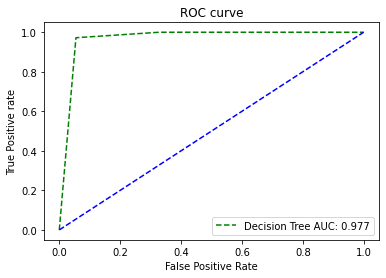

In [ ]:
random_probs = [0 for i in range(len(y_test))]
fpr4, tpr4, thresh1 = roc_curve(y_test, dtree_pred_prob[:,1], pos_label=1)
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr4, tpr4, linestyle='--',color='green', label=f"Decision Tree AUC: {dtreernd}")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Decision Tree ROC',dpi=300)
plt.show();

In [ ]:
logreg = LogisticRegression(random_state=42, multi_class = "ovr", verbose=0)
logreg.fit(X_train, y_train)
predict = logreg.predict(X_test)
log_prob = logreg.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

In [ ]:
#logreg2 = LogisticRegression(random_state=42, multi_class = "ovr")

In [ ]:
cm = confusion_matrix(y_test, predict)
f1 = f1_score(y_test, predict, average='micro')
print("Confusion Matrix\n",cm)
print("Classification Report\n",(metrics.classification_report(y_test, predict, digits=3)))

Confusion Matrix
 [[31  3  9  6]
 [ 4 14  4 14]
 [ 0  0 29  8]
 [ 0  1  4 37]]
Classification Report
               precision    recall  f1-score   support

           0      0.886     0.633     0.738        49
           1      0.778     0.389     0.519        36
           2      0.630     0.784     0.699        37
           3      0.569     0.881     0.692        42

    accuracy                          0.677       164
   macro avg      0.716     0.672     0.662       164
weighted avg      0.723     0.677     0.669       164



In [ ]:
crossvallog = cross_val_score(logreg, x, y, cv = 20)
crossvallog

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iteratio

array([0.53658537, 0.6097561 , 0.56097561, 0.63414634, 0.68292683,
       0.68292683, 0.7804878 , 0.75609756, 0.70731707, 0.70731707,
       0.68292683, 0.75609756, 0.70731707, 0.68292683, 0.68292683,
       0.70731707, 0.63414634, 0.70731707, 0.70731707, 0.675     ])

In [ ]:
crossvallog

array([0.53658537, 0.6097561 , 0.56097561, 0.63414634, 0.68292683,
       0.68292683, 0.7804878 , 0.75609756, 0.70731707, 0.70731707,
       0.68292683, 0.75609756, 0.70731707, 0.68292683, 0.68292683,
       0.70731707, 0.63414634, 0.70731707, 0.70731707, 0.675     ])

In [ ]:

logscore = (roc_auc_score(y_test, log_prob, multi_class='ovr')).round(2)
logscore

0.92

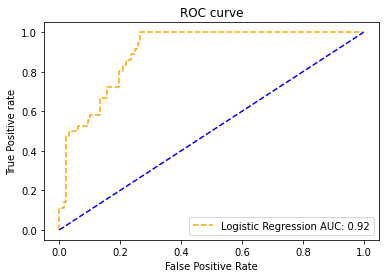

In [ ]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, log_prob[:,1], pos_label=1)
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=f"Logistic Regression AUC: {logscore}")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Log Reg ROC',dpi=300)
plt.show();

In [ ]:
"""fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, log_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); """

"fpr = {}\ntpr = {}\nthresh ={}\n\nn_class = 4\n\nfor i in range(n_class):    \n    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, log_prob[:,i], pos_label=i)\n    \n# plotting    \nplt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')\nplt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')\nplt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')\nplt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')\nplt.title('Multiclass ROC curve')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive rate')\nplt.legend(loc='best')\nplt.savefig('Multiclass ROC',dpi=300); "

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)
rfpred_prob = rf.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
cm = confusion_matrix(y_test, rfpred)
f1 = f1_score(y_test, rfpred, average='micro')
print("Confusion Matrix\n\n",cm, "\n")
print("Classification Report\n\n",(metrics.classification_report(y_test, rfpred, digits=3)))

Confusion Matrix

 [[47  2  0  0]
 [ 0 36  0  0]
 [ 0  1 36  0]
 [ 0  0  0 42]] 

Classification Report

               precision    recall  f1-score   support

           0      1.000     0.959     0.979        49
           1      0.923     1.000     0.960        36
           2      1.000     0.973     0.986        37
           3      1.000     1.000     1.000        42

    accuracy                          0.982       164
   macro avg      0.981     0.983     0.981       164
weighted avg      0.983     0.982     0.982       164



In [ ]:
cols = list(x.columns)

In [ ]:
feature_names = [f"{i}" for i in range(x.shape[1])]
feature_names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


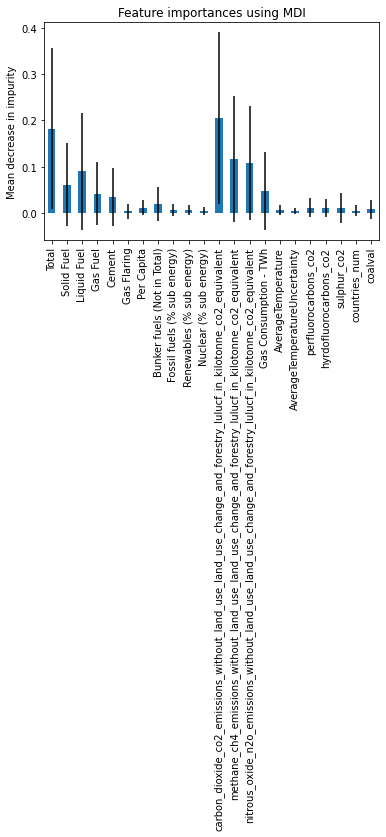

In [ ]:
feature_names = [f"{cols[i]}" for i in range(x.shape[1])]
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.savefig('Random Forest Feature Importance',dpi=300)
fig.tight_layout()

In [ ]:
list(x.columns)

['Total',
 'Solid Fuel',
 'Liquid Fuel',
 'Gas Fuel',
 'Cement',
 'Gas Flaring',
 'Per Capita',
 'Bunker fuels (Not in Total)',
 'Fossil fuels (% sub energy)',
 'Renewables (% sub energy)',
 'Nuclear (% sub energy)',
 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
 'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
 'Gas Consumption - TWh',
 'AverageTemperature',
 'AverageTemperatureUncertainty',
 'perfluorocarbons_co2',
 'hyrdofluorocarbons_co2',
 'sulphur_co2',
 'countries_num',
 'coalval']

In [ ]:
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11',
 'feature 12',
 'feature 13',
 'feature 14',
 'feature 15',
 'feature 16',
 'feature 17',
 'feature 18',
 'feature 19',
 'feature 20',
 'feature 21']

In [ ]:
rfscore = roc_auc_score(y_test, rfpred_prob, multi_class='ovr')
rfscore

0.9996277066080055

In [ ]:
rfscoreround = ".99~"

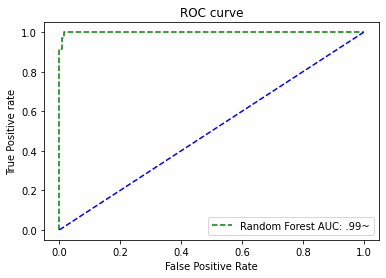

In [ ]:
fpr2, tpr2, thresh1 = roc_curve(y_test, rfpred_prob[:,1], pos_label=1)
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label=f"Random Forest AUC: {rfscoreround}")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('RandomForest ROC',dpi=300)
plt.show();

Very little differentiation between classes hear as the ROC

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 902
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   class   819 non-null    category
dtypes: category(1)
memory usage: 7.4 KB


In [ ]:
cvrf = cross_val_score(rf, x, y, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
cvrf

array([0.97560976, 0.97560976, 0.96341463, 1.        , 0.97560976,
       0.96341463, 0.98780488, 0.98780488, 0.97560976, 0.96296296])

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
neighpred = neigh.predict(X_test)
neighpred_prob = neigh.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
cm = confusion_matrix(y_test, neighpred)
f1 = f1_score(y_test, neighpred, average='micro')
print("Confusion Matrix\n",cm,"\n")
print("Classification Report\n",(metrics.classification_report(y_test, neighpred, digits=3)))

Confusion Matrix
 [[47  2  0  0]
 [ 1 35  0  0]
 [ 0  1 36  0]
 [ 0  0  2 40]] 

Classification Report
               precision    recall  f1-score   support

           0      0.979     0.959     0.969        49
           1      0.921     0.972     0.946        36
           2      0.947     0.973     0.960        37
           3      1.000     0.952     0.976        42

    accuracy                          0.963       164
   macro avg      0.962     0.964     0.963       164
weighted avg      0.965     0.963     0.964       164



In [ ]:
knnscore = roc_auc_score(y_test, neighpred_prob, multi_class='ovr')
knnscore = .988

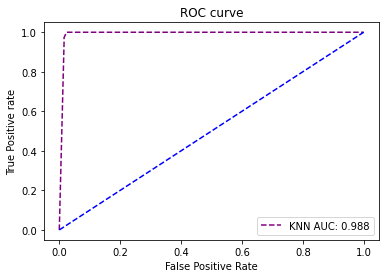

In [ ]:
fpr3, tpr3, thresh1 = roc_curve(y_test, neighpred_prob[:,1], pos_label=1)
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label=f"KNN AUC: {knnscore}")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('KNN ROC',dpi=300)
plt.show();

In [ ]:
knnrf = cross_val_score(neigh, x, y, scoring = "f1_weighted", cv = 20)
knnrf

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

array([1.        , 1.        , 1.        , 0.97554863, 0.95115838,
       0.97560976, 0.97549813, 0.95110789, 1.        , 0.92682927,
       1.        , 1.        , 1.        , 0.97554863, 0.97554863,
       0.97549813, 0.97560976, 0.97549813, 0.97554863, 0.92443229])

In [ ]:
###ALL GRAPHS TOGETHER 

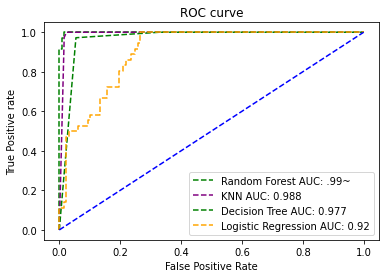

In [ ]:
fpr2, tpr2, thresh1 = roc_curve(y_test, rfpred_prob[:,1], pos_label=1)
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr2, tpr2, linestyle='--',color='green', label=f"Random Forest AUC: {rfscoreround}")
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label=f"KNN AUC: {knnscore}")
plt.plot(fpr4, tpr4, linestyle='--',color='green', label=f"Decision Tree AUC: {dtreernd}")
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=f"Logistic Regression AUC: {logscore}")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Total ROC',dpi=300)
plt.show();

In [ ]:
#train['class'].nunique()

In [ ]:
#train['class'].value_counts()

In [ ]:
#train.info()

In [ ]:
#df["filledin"] = train.groupby("short_name").transform(lambda x: x.fillna(x.mean()))

In [ ]:
#df_final.describe()

In [ ]:
#df_final.info()

In [ ]:
#train.info()

In [ ]:
#nodups = df_final.drop_duplicates()

In [ ]:
#nodups.info

In [ ]:
# get rid of unkowns from all dataframes?
# some columns still have text values in them 
# not merging correctly need to look into how to merge, key is not unique 
# figure out which should be the starting table in the list merge
# could do manually merge one dataframe at a time 
